In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\91765\Downloads\diamonds.csv")

In [10]:
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940

In [11]:
print(df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [12]:
correlation = df[['carat', 'price']].corr()
print("Correlation between carat and price:")
print(correlation)


Correlation between carat and price:
          carat     price
carat  1.000000  0.921591
price  0.921591  1.000000


In [13]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Carat vs Price, colored by Cut')

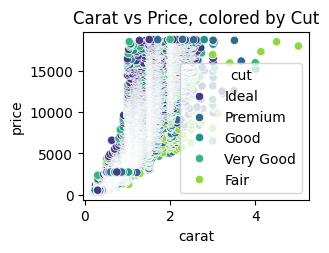

In [14]:
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='carat', y='price', hue='cut', palette='viridis')
plt.title('Carat vs Price, colored by Cut')

Text(0.5, 1.0, 'Price Distribution by Color')

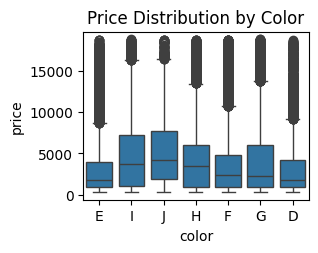

In [15]:
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='color', y='price')
plt.title('Price Distribution by Color')

Text(0.5, 1.0, 'Price Distribution by Cut')

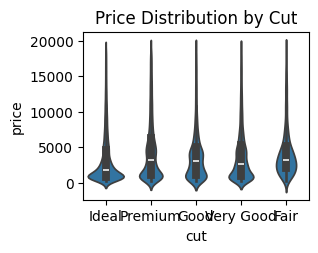

In [16]:
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='cut', y='price')
plt.title('Price Distribution by Cut')

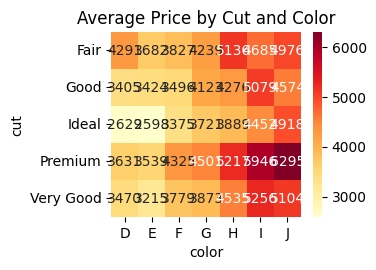

In [19]:
plt.subplot(2, 2, 4)
pivot = df.pivot_table(values='price', index='cut', columns='color', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Price by Cut and Color')
plt.tight_layout()
plt.show()

In [20]:
avg_price_by_cut = df.groupby('cut')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Cut:")
print(avg_price_by_cut)


Average Price by Cut:
cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64


In [21]:
avg_price_by_color = df.groupby('color')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Color:")
print(avg_price_by_color)


Average Price by Color:
color
J    5323.818020
I    5091.874954
H    4486.669196
G    3999.135671
F    3724.886397
D    3169.954096
E    3076.752475
Name: price, dtype: float64


In [61]:
df['carat_category'] = pd.cut(df['carat'], bins=[0, 0.5, 1, 1.5, 2, 5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2+'])
price_range_by_carat = df.groupby('carat_category', observed=False)['price'].agg(['min', 'max', 'mean'])
print("\nPrice Range by Carat Category:")
print(price_range_by_carat)


Price Range by Carat Category:
                 min    max          mean
carat_category                           
0-0.5            326   3378    839.718149
0.5-1            806  16469   2811.342683
1-1.5           1262  18700   6513.526534
1.5-2           3105  18818  11321.774838
2+              5203  18823  14949.626059


In [62]:
def estimate_price(carat, cut, color):
    carat_category = pd.cut([carat], bins=[0, 0.5, 1, 1.5, 2, 5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2+']).astype(str)[0]
    avg_price_carat = price_range_by_carat.loc[carat_category, 'mean']
    avg_price_cut = avg_price_by_cut[cut]
    avg_price_color = avg_price_by_color[color]
    estimated_price = (avg_price_carat + avg_price_cut + avg_price_color) / 3
    return estimated_price

In [63]:
example_carat = 2.0
example_cut = 'Ideal'
example_color = 'E'
estimated_price = estimate_price(example_carat, example_cut, example_color)
print(f"\nEstimated price for a {example_carat} carat, {example_cut} cut, {example_color} color diamond: ${estimated_price:.2f}")


Estimated price for a 2.0 carat, Ideal cut, E color diamond: $5952.02
